<a href="https://colab.research.google.com/github/charmander2810/Deep_Learning/blob/main/Dog_breed_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow_hub as hub
import os

In [ ]:
# read the label
label=pd.read_csv("/content/drive/MyDrive/Dog vision/dog-breed-identification/labels.csv")
label[:10]
# it contains id and the breed

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier
6,00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier
7,002a283a315af96eaea0e28e7163b21b,borzoi
8,003df8b8a8b05244b1d920bb6cf451f9,basenji
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound


In [ ]:
#get the train image path by using the id in the label
filename=["/content/drive/MyDrive/Dog vision/dog-breed-identification/train/"+ fname +".jpg" for fname in label["id"]  ]
filename[:10]

['/content/drive/MyDrive/Dog vision/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Dog vision/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Dog vision/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Dog vision/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Dog vision/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Dog vision/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Dog vision/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Dog vision/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Dog vision/dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Dog vision/dog-breed-

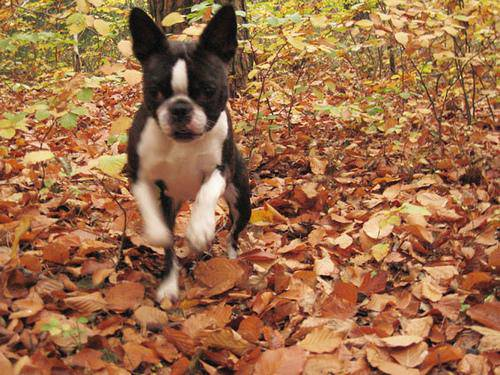

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/Dog vision/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg')#this is what the filename contains


In [ ]:
breeds=label["breed"].to_numpy()

In [ ]:
unique_breed=np.unique(breeds)
unique_breed

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
# change the breeds into boolean
boolean_label=[i==unique_breed for i in breeds]
boolean_label[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
# set the x and y
x=filename
y=boolean_label


In [ ]:
# let split our data into train and validation sets
from sklearn.model_selection import train_test_split

#split them into training and validation of total size NUM_IMAGES
x_train,x_val,y_train,y_val=train_test_split(x,
                                             y,
                                             test_size=0.2,
                                            random_state=42)

len(x_train),len(y_train),len(x_val),len(y_val)

(8177, 8177, 2045, 2045)

In [ ]:
# define image size

IMG_SIZE=224

#create a function for preprocessing images
def process_image(image_path,img_size=IMG_SIZE):
  """
  takes an image file path and turns the image into a tensor.
  """
  #read in an image file
  image=tf.io.read_file(image_path)

  #turn the ipg image into numerical tensor with 3 colour channels(red,green,blue)
  image=tf.image.decode_jpeg(image,channels=3)

  #convert the colour channels values from 0-255 to 0-1 values
  image=tf.image.convert_image_dtype(image,tf.float32)

  #resize the image to our desired values(224,224)
  image=tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])

  return image


In [ ]:
#create a simple function to return the tuple (image,label)
def get_image_label(image_path,label):
  """
  take an image file path name and the association label,
  processes the image and returns a tuple of(image,label).
  """
  image=process_image(image_path)
  return image,label

In [ ]:
#create a databatches
#define the batch size 32 is good start
BATCH_SIZE=32

#create a function to turn data into batches
def create_data_batches(x,y=None,batch_size=BATCH_SIZE,valid_data=False,test_data=False):
  """
  creates batches of data out of image (x) and label (y) pairs.
  shuffles the data if its training data but doesnt shuffle if it's validation data.
  also accept test data as input(no labels).
  """
  #if the data is a test dataset we probably dont have labels
  if test_data:
    print("creating test data batches..")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x)))  #only filepaths (no labels)
    data_batch=data.map(process_image).batch(BATCH_SIZE)
    return data_batch
    #if the data is a valid dataset,we dont need to shuffle it
  elif valid_data:
    print("creating validation data batches..")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x), #filepaths
                                             tf.constant(y))) # labels
    data_batch=data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("creating training data batch..")
    #turn filepath and labels into tensors
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                             tf.constant(y)))
    #shuffling pathname and labels before mapping image processor function is faster than shuffling images
    data =data.shuffle(buffer_size=len(x))


    #create (image,label) tuples(this also turns the image path into a preprocessed image
    data=data.map(get_image_label)

    # turn the training data into batches
    data_batch=data.batch(BATCH_SIZE)

  return data_batch




In [ ]:
data=create_data_batches(x_train,y_train)
val_data=create_data_batches(x_val,y_val,valid_data=True)

creating training data batch..
creating validation data batches..


In [ ]:
# setup input shape to the model

INPUT_SHAPE=[None,IMG_SIZE,IMG_SIZE,3]# batch,height,width,colour channels

#setup output shape of our model
OUTPUT_SHAPE=len(unique_breed)

#setup model URL from tensorflow Hub
MODEL_URL="https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

# https://tfhub.dev/google/imagenet/resnet_v2_50/classification/5


In [ ]:
# create a function which builds a keras model:
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):
  print("Building model with:",MODEL_URL)

  #setup the model layers
  model=tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL), #layer1 (input layer)
      tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                            activation="softmax") # layer 2 (output layer)
  ])

  #compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # build the model
  model.build(INPUT_SHAPE)

  return model

In [ ]:
#callbacks
#load tensorboard notebook extension
%load_ext tensorboard

import datetime

#create a function to build a tensorboard callbacks
def create_tensorboard_callbacks():
  #create a log directory for storing tensorboard logs
  logdir=os.path.join("drive/MyDrive/Dog vision/logs",
                      #make it so the logs get tracked whenever we run an experiment
                      datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)


In [ ]:
# Early stopping
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                           patience=3)

In [ ]:
NUM_EPOCHS=10

In [ ]:
# training a model

# build a function to train and return a trained model
def train_model():
  """
  trains a given model and returns the trained version.
  """
  #create a model
  model=create_model()

  # create new tensorboard session evertime we train a model
  tensorboard=create_tensorboard_callbacks()

  #fit the model to the data passing it the callbacks we created
  model.fit(x=data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard,early_stopping])

  #return the fitted model
  return model

In [ ]:
model=train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/10
256/256 [==============================] - 46s 158ms/step - loss: 1.4991 - accuracy: 0.6352 - val_loss: 0.7384 - val_accuracy: 0.7795
Epoch 2/10
256/256 [==============================] - 40s 155ms/step - loss: 0.4143 - accuracy: 0.8778 - val_loss: 0.6582 - val_accuracy: 0.7995
Epoch 3/10
256/256 [==============================] - 42s 166ms/step - loss: 0.2346 - accuracy: 0.9419 - val_loss: 0.6468 - val_accuracy: 0.8059
Epoch 4/10
256/256 [==============================] - 44s 173ms/step - loss: 0.1504 - accuracy: 0.9666 - val_loss: 0.6631 - val_accuracy: 0.8059
Epoch 5/10
256/256 [==============================] - 39s 153ms/step - loss: 0.1019 - accuracy: 0.9812 - val_loss: 0.6625 - val_accuracy: 0.8142
Epoch 6/10
256/256 [==============================] - 43s 170ms/step - loss: 0.0740 - accuracy: 0.9883 - val_loss: 0.6795 - val_accuracy: 0.8093
Epoch 7/10
256/256 [=================

In [ ]:
#if you want to predict the validation sets unbatch the val_data yu get val_images and val_labels
#use val_images to predict you a predicted_val_labels and compare the val_labels and predicted_val_labels
#preidct the test data

In [ ]:
# create a function to save a model
def save_model(model,suffix=None):
  """
  saves a given model in a models directory and appends a suffix (string).
  """
  # create a model directory pathname with current time
  modeldir=os.path.join("drive/MyDrive/Dog vision/models",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path=modeldir + "-" + suffix + ".h5" # save format of model
  print(f"saving model to:{model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
save_model(model, suffix="first_model_dog_breedl")

saving model to:drive/MyDrive/Dog vision/models/20230820-10101692526258-first_model_dog_breedl.h5...


'drive/MyDrive/Dog vision/models/20230820-10101692526258-first_model_dog_breedl.h5'

In [ ]:
#create a function to load a trained model
def load_model(model_path):
  """
  load a saved model from a specified path.
  """
  print(f"loading saved model from : {model_path}")
  model=tf.keras.models.load_model(model_path,
                                   custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
model =load_model('drive/MyDrive/Dog vision/models/20230820-10101692526258-first_model_dog_breedl.h5')

loading saved model from : drive/MyDrive/Dog vision/models/20230820-10101692526258-first_model_dog_breedl.h5


In [ ]:
# make predictions on test data
# load test image filenames
test_path='/content/drive/MyDrive/Dog vision/dog-breed-identification/test/'
test_filenames=[test_path+fname for fname in os.listdir(test_path)]
test_filenames[:10]

['/content/drive/MyDrive/Dog vision/dog-breed-identification/test/e6a5c18da7beedb1622bf7d18b452121.jpg',
 '/content/drive/MyDrive/Dog vision/dog-breed-identification/test/e7dc8cc599049ea9fa2a172c88646c57.jpg',
 '/content/drive/MyDrive/Dog vision/dog-breed-identification/test/def88eeacc633cbc3d46d5f5fb495379.jpg',
 '/content/drive/MyDrive/Dog vision/dog-breed-identification/test/dd2c0c44f98af0cf223572a1aa189779.jpg',
 '/content/drive/MyDrive/Dog vision/dog-breed-identification/test/e406358fe35be30ac65f11936c2a066e.jpg',
 '/content/drive/MyDrive/Dog vision/dog-breed-identification/test/e4897fe96990006c10ec7336772cbd37.jpg',
 '/content/drive/MyDrive/Dog vision/dog-breed-identification/test/e4a8dfc6e219b20a0cbced41eaf6a435.jpg',
 '/content/drive/MyDrive/Dog vision/dog-breed-identification/test/e366960ee7583d7ffd22783085b53e5d.jpg',
 '/content/drive/MyDrive/Dog vision/dog-breed-identification/test/e78b50f1d12148deef4c564ea4c88050.jpg',
 '/content/drive/MyDrive/Dog vision/dog-breed-identific

In [ ]:
len(test_filenames)

10357

In [ ]:
# create  test data batch
test_data=create_data_batches(test_filenames,test_data=True)

creating test data batches..


In [ ]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
# make prediction on test data batch using the loaded full model
test_predictions=loaded_model.predict(test_data)

324/324 [==============================] - 4014s 12s/step


In [ ]:
test_predictions # now we got the prediction for the test_data

array([[8.6918857e-07, 2.7878045e-07, 9.7911744e-08, ..., 1.3143463e-07,
        1.2846067e-08, 1.2524100e-06],
       [2.9130810e-05, 3.6505935e-07, 4.5179022e-06, ..., 7.9890150e-08,
        2.3275839e-05, 4.0044224e-06],
       [7.9345863e-09, 6.4362993e-08, 2.2489958e-08, ..., 3.6090475e-07,
        1.3588725e-05, 7.3060778e-06],
       ...,
       [6.9401420e-07, 7.3934707e-04, 8.3396400e-05, ..., 1.5700271e-03,
        1.5667090e-03, 7.1648415e-08],
       [4.5667371e-06, 2.2650408e-06, 4.4339863e-06, ..., 1.4148461e-07,
        5.9397408e-04, 9.8464452e-06],
       [3.5151754e-08, 1.1156741e-04, 1.0053336e-08, ..., 2.6700008e-07,
        2.1346352e-06, 1.5864873e-09]], dtype=float32)

In [ ]:
test_predictions.shape

(10357, 120)

In [ ]:
names=[]

In [ ]:
# turn prediction probability into their respective label(easier to understand)
def get_pred_label(predictions_probabilities):
  """
  turns an array of predictions probabilities into a label.
  """
  return unique_breed[np.argmax(predictions_probabilities)]

# get a predicted label based on an array of prediction probabilities
for i in range(len(test_predictions)):
    pred_label=get_pred_label(test_predictions[i])
    names.append(pred_label)

In [ ]:
names[:10]

['irish_water_spaniel',
 'border_collie',
 'dandie_dinmont',
 'pug',
 'doberman',
 'irish_wolfhound',
 'beagle',
 'scotch_terrier',
 'irish_wolfhound',
 'norwegian_elkhound']

In [ ]:
from IPython.display import Image
Image(test_filenames[0])

(<IPython.core.display.Image object>, 'irish_water_spaniel')

In [ ]:
names[0]

'irish_water_spaniel'

In [ ]:
def show_25_images(images,labels):
  """
  displays a plot of 25 images and their labels from a data batch.
  """
  #setup the figure
  plt.figure(figsize=(10,10))
  #loop through 25(for displaying 25 images)
  for i in range(25):
    #create subplots(5 rows,5 columns)
    ax=plt.subplot(5,5,i+1)
    #display an image
    plt.imshow(tests_images[i])
    #add the image label as the title
    plt.title(names[i])
    #turn the grid lines off
    plt.axis("off")

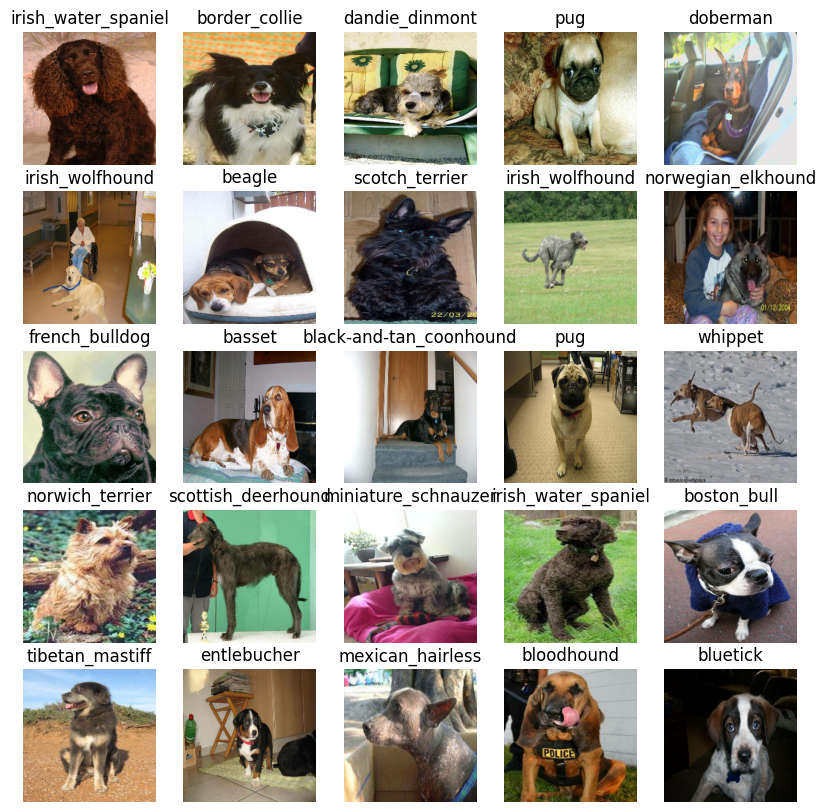

In [ ]:
tests_images=next(test_data.as_numpy_iterator())
show_25_images(tests_images,names)

#prediction taken from google


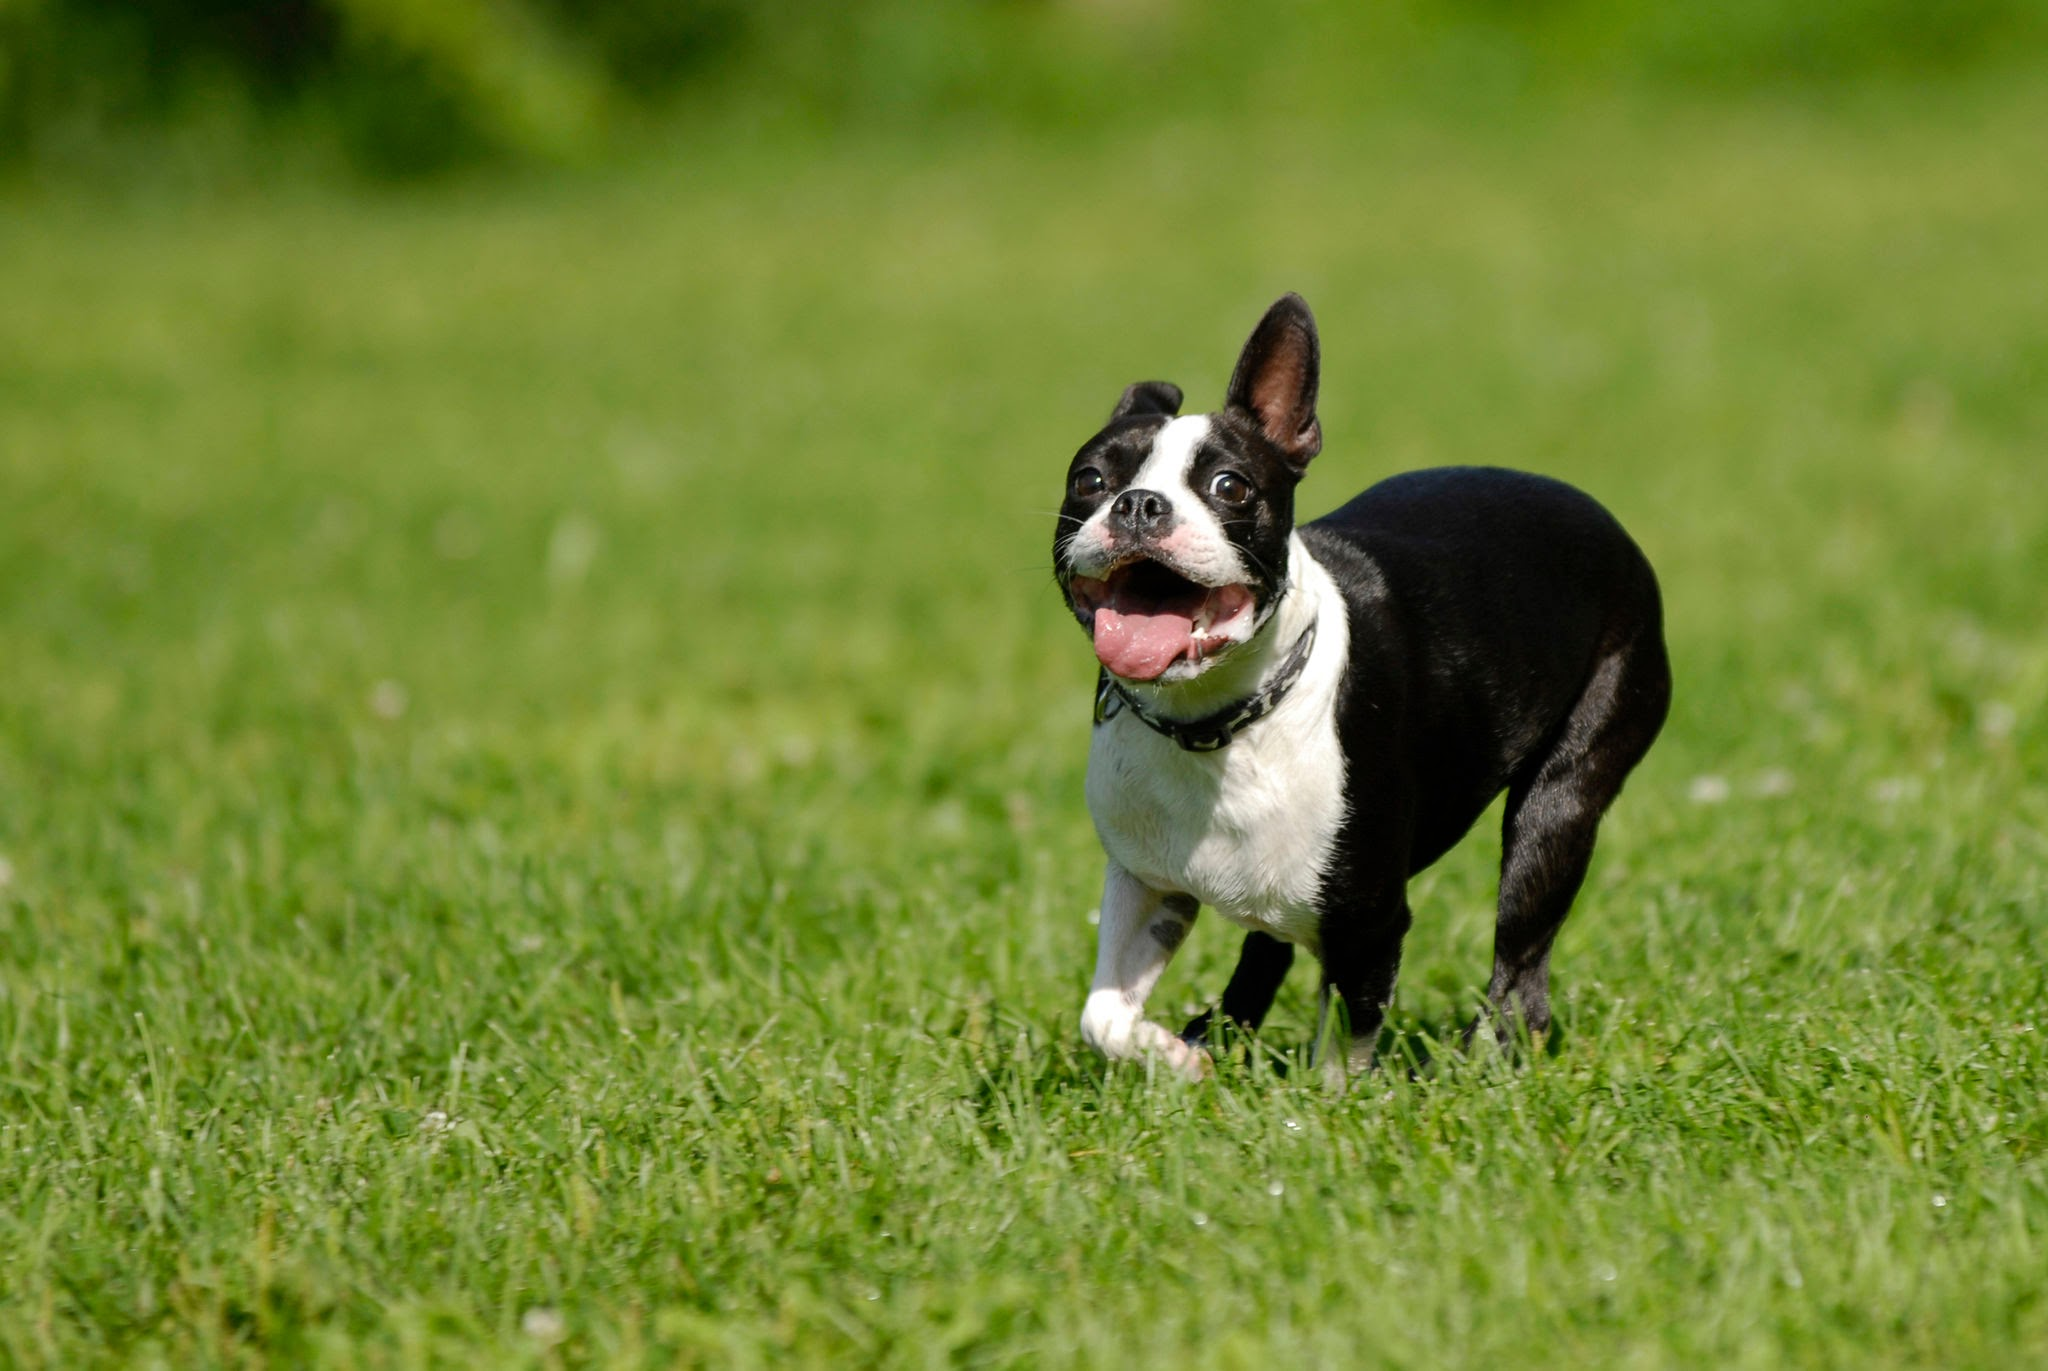

In [ ]:
Image("/content/drive/MyDrive/Dog vision/dog-breed-identification/image_from_google/licensed-image.jpg")

In [ ]:
google_filename="/content/drive/MyDrive/Dog vision/dog-breed-identification/image_from_google/licensed-image.jpg"

In [ ]:
from_google=create_data_batches([google_filename],test_data=True)

creating test data batches..


In [ ]:
from_google

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
google_predict=loaded_model.predict(from_google)
google_predict

1/1 [==============================] - 0s 85ms/step


array([[7.53153344e-08, 1.24766664e-09, 5.75413287e-06, 1.62424474e-08,
        1.07466877e-02, 3.25167603e-05, 3.05864987e-08, 4.09008411e-04,
        8.20023729e-07, 4.39876840e-06, 3.37097094e-06, 4.96366147e-06,
        1.34233042e-08, 1.00469910e-09, 5.14978016e-09, 3.79825651e-05,
        1.65304533e-04, 1.94399909e-05, 4.22979838e-08, 9.78192925e-01,
        1.16625074e-07, 3.98003586e-08, 2.51519367e-07, 8.62192273e-09,
        3.02044555e-06, 1.31730680e-08, 1.71095655e-06, 8.62131245e-04,
        1.82830640e-08, 5.05731814e-03, 3.27648024e-08, 2.49593711e-07,
        3.17948911e-06, 8.98663711e-05, 4.45673152e-08, 6.59942657e-07,
        7.48847118e-09, 1.57078368e-08, 1.84349759e-07, 5.71860674e-08,
        3.40738757e-06, 5.10444515e-04, 1.88779969e-09, 1.24991948e-06,
        4.36430810e-06, 1.08957662e-04, 1.05748946e-07, 7.61605261e-05,
        7.64155914e-07, 2.17901563e-09, 8.16631207e-09, 2.77883482e-05,
        3.36175674e-08, 3.03182751e-04, 3.27678208e-07, 1.711606

In [ ]:
google_predict.shape

(1, 120)

In [ ]:
google_name_predicted=unique_breed[np.argmax(google_predict)]

In [ ]:
google_name_predicted

'boston_bull'